In [30]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
data_folder = r"C:\Users\pipi3\Desktop\Course\year3_sem3 (Japan)\FYP\input_data\vgchartz";

In [32]:
#raw data
df = pd.read_excel(data_folder+"\\Global Hardware Sales by Platform.xlsx", sheetname='2017')
df.head()

,Platform,Year,Change,Total
0,PS4,4500443,(-74%),58298449
1,NS,3662147,(-74%),3662147
2,XOne,1723660,(-79%),29671046
3,3DS,1316435,(-81%),64645010
4,PSV,401969,(-80%),15541874


In [33]:
#create pivot table (Platform vs Total Sales)
for i in range(12):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Hardware Sales by Platform.xlsx", sheetname=sname)
    locals()["pt"+str(i+5)] = df.pivot_table(values='Year', index=['Platform'], aggfunc='sum')

#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16], axis=1)
pd.options.display.float_format = '{:,.0f}'.format
df.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
#dfps = df.fillna(0) #Platform, Sales
dfpsall = df.transpose()
dfpsall.reset_index(level=0, inplace=True)
dfpsall = dfpsall.rename(columns = {'index':'Year'})
dfpsall

,Year,3DS,DS,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2005,nan,"10,991,195",nan,nan,"9,613,346",nan,nan,nan,"1,178,267",nan
1,2006,nan,"20,776,966","1,252,040",nan,"9,488,584",nan,"2,954,781",nan,"6,801,532",nan
2,2007,nan,"29,508,695","7,922,055",nan,"12,814,297",nan,"16,553,289",nan,"7,879,552",nan
3,2008,nan,"29,663,772","10,204,758",nan,"14,048,403",nan,"24,188,263",nan,"10,913,123",nan
4,2009,nan,"27,573,530","12,997,974",nan,"9,855,987",nan,"21,295,417",nan,"10,160,518",nan
5,2010,nan,"20,620,707","13,896,438",nan,"9,243,328",nan,"17,320,956",nan,"13,253,914",nan
6,2011,"13,250,062","8,759,675","14,706,691",nan,"7,459,539","481,573","11,522,685",nan,"13,808,365",nan
7,2012,"14,112,182","3,012,615","12,150,117",nan,"4,220,108","3,674,466","5,082,024","2,247,216","10,677,206",nan
8,2013,"14,369,898","818,084","8,252,038","4,430,139","2,973,884","3,204,823","1,947,850","3,113,285","6,239,751","3,075,770"
9,2014,"9,738,396",nan,"3,557,573","14,560,282","391,786","2,847,634","515,969","3,644,476","2,600,902","7,908,581"


In [34]:
dfpsall['Total'] = 0
for i in range(1, 11):
    dfpsall['Total'] += dfpsall[dfpsall.columns[i]].fillna(0)
dfpsall

,Year,3DS,DS,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,Total
0,2005,nan,"10,991,195",nan,nan,"9,613,346",nan,nan,nan,"1,178,267",nan,"21,782,808"
1,2006,nan,"20,776,966","1,252,040",nan,"9,488,584",nan,"2,954,781",nan,"6,801,532",nan,"41,273,903"
2,2007,nan,"29,508,695","7,922,055",nan,"12,814,297",nan,"16,553,289",nan,"7,879,552",nan,"74,677,888"
3,2008,nan,"29,663,772","10,204,758",nan,"14,048,403",nan,"24,188,263",nan,"10,913,123",nan,"89,018,319"
4,2009,nan,"27,573,530","12,997,974",nan,"9,855,987",nan,"21,295,417",nan,"10,160,518",nan,"81,883,426"
5,2010,nan,"20,620,707","13,896,438",nan,"9,243,328",nan,"17,320,956",nan,"13,253,914",nan,"74,335,343"
6,2011,"13,250,062","8,759,675","14,706,691",nan,"7,459,539","481,573","11,522,685",nan,"13,808,365",nan,"69,988,590"
7,2012,"14,112,182","3,012,615","12,150,117",nan,"4,220,108","3,674,466","5,082,024","2,247,216","10,677,206",nan,"55,175,934"
8,2013,"14,369,898","818,084","8,252,038","4,430,139","2,973,884","3,204,823","1,947,850","3,113,285","6,239,751","3,075,770","48,425,522"
9,2014,"9,738,396",nan,"3,557,573","14,560,282","391,786","2,847,634","515,969","3,644,476","2,600,902","7,908,581","45,765,599"


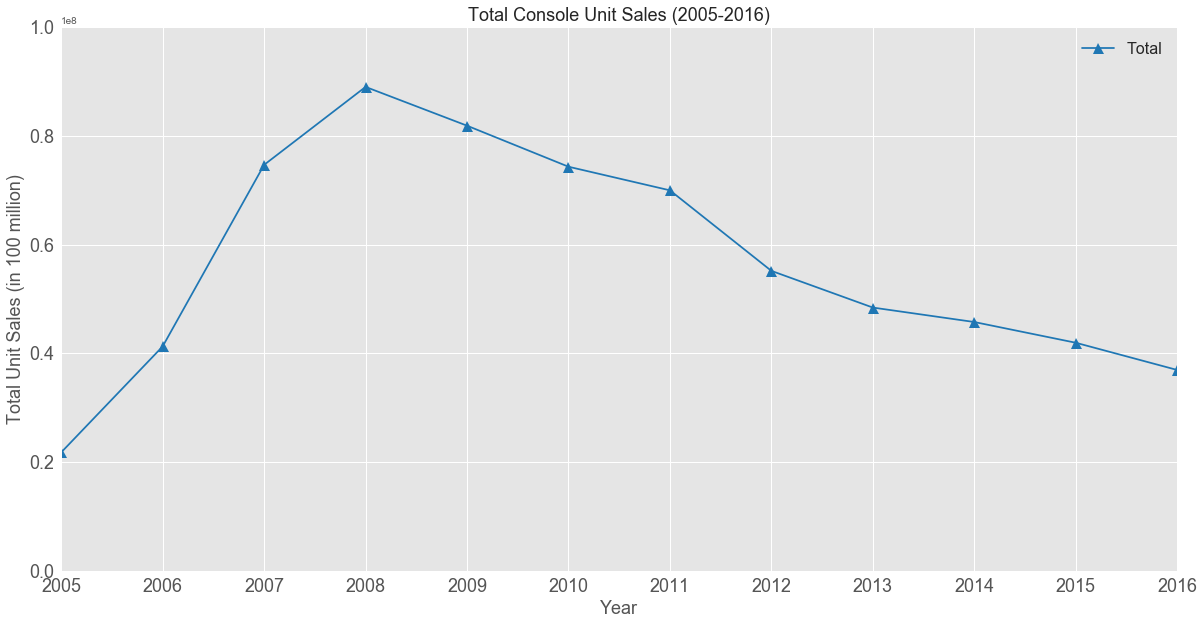

In [35]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
ax = dfpsall['Total'].plot(table=False, figsize=(20,10), color=colors, fontsize=18, marker='^', markersize=11)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Total Unit Sales (in 100 million)", fontsize=18)
ax.set_xticks(np.arange(len(dfpsall['Year'])))
ax.set_xticklabels(dfpsall['Year'])
ax.set_ylim([0,100000000])
ax.set_title('Total Console Unit Sales (2005-2016)', fontsize=18)
plt.legend(loc='best', fontsize=16)
#ax.get_xaxis().set_visible(True)


In [36]:
#platform = nintendo + sony + microsoft
nintendo = ['3DS', 'DS', 'NS','Wii', 'WiiU']
sony = ['PS3', 'PS4', 'PSP', 'PSV']
microsoft = ['X360', 'XOne']
company = ['Nintendo', 'Sony', 'Microsoft'] 

In [37]:
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3DS,nan,nan,nan,nan,nan,nan,"13,250,062","14,112,182",14369898,"9,738,396","7,326,085","7,030,845"
DS,"10,991,195","20,776,966","29,508,695","29,663,772","27,573,530","20,620,707","8,759,675","3,012,615",818084,nan,nan,nan
PS3,nan,"1,252,040","7,922,055","10,204,758","12,997,974","13,896,438","14,706,691","12,150,117",8252038,"3,557,573","1,342,092","517,916"
PS4,nan,nan,nan,nan,nan,nan,nan,nan,4430139,"14,560,282","17,510,227","17,130,861"
PSP,"9,613,346","9,488,584","12,814,297","14,048,403","9,855,987","9,243,328","7,459,539","4,220,108",2973884,"391,786",nan,nan
PSV,nan,nan,nan,nan,nan,nan,"481,573","3,674,466",3204823,"2,847,634","2,681,299","2,041,540"
Wii,nan,"2,954,781","16,553,289","24,188,263","21,295,417","17,320,956","11,522,685","5,082,024",1947850,"515,969","74,946",nan
WiiU,nan,nan,nan,nan,nan,nan,nan,"2,247,216",3113285,"3,644,476","3,459,547","1,525,551"
X360,"1,178,267","6,801,532","7,879,552","10,913,123","10,160,518","13,253,914","13,808,365","10,677,206",6239751,"2,600,902","928,456","391,737"
XOne,nan,nan,nan,nan,nan,nan,nan,nan,3075770,"7,908,581","8,631,257","8,306,621"


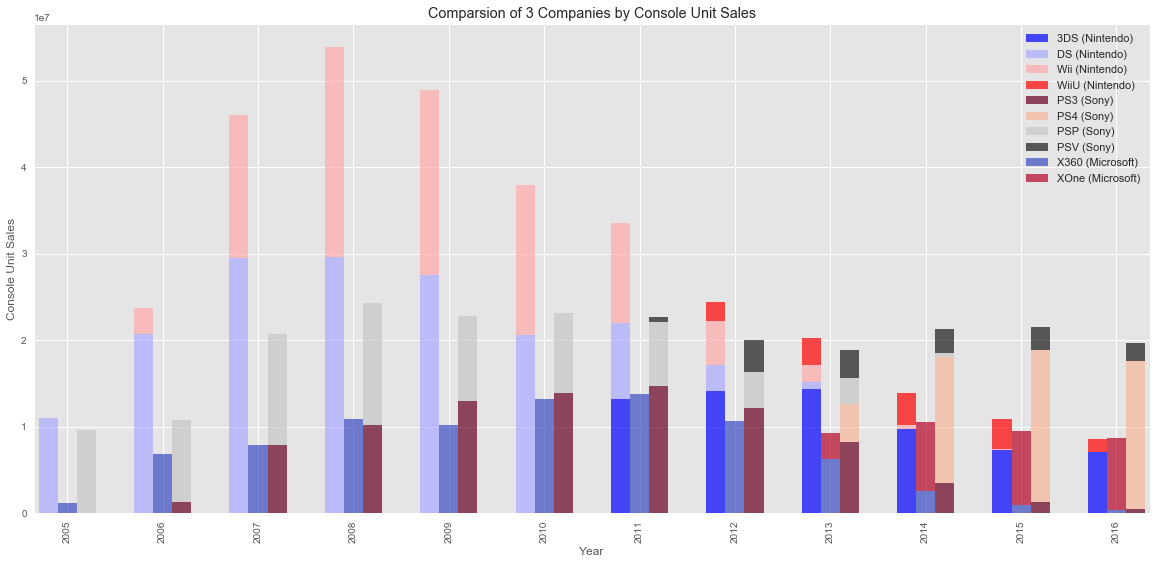

In [38]:
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['3DS', 'DS','Wii', 'WiiU']].plot.bar(stacked=True, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)
ax = dfpsall[['PS3', 'PS4', 'PSP', 'PSV']].plot.bar(stacked=True, width=0.2, position=-0.5, colormap="RdGy", ax=ax, alpha=0.7)
ax = dfpsall[['X360', 'XOne']].plot.bar(stacked=True, width=0.2, position=0.5, colormap="coolwarm", ax=ax, alpha=0.7)


ax.set_xlabel("Year")
ax.set_ylabel("Console Unit Sales")
ax.set_xticklabels(dfpsall['Year'])
ax.set_title('Comparsion of 3 Companies by Console Unit Sales')
plt.legend(['3DS (Nintendo)', 'DS (Nintendo)','Wii (Nintendo)', 'WiiU (Nintendo)', 
            'PS3 (Sony)', 'PS4 (Sony)', 'PSP (Sony)', 'PSV (Sony)', 'X360 (Microsoft)', 'XOne (Microsoft)']
           , loc='best',prop={'size':11})
ax

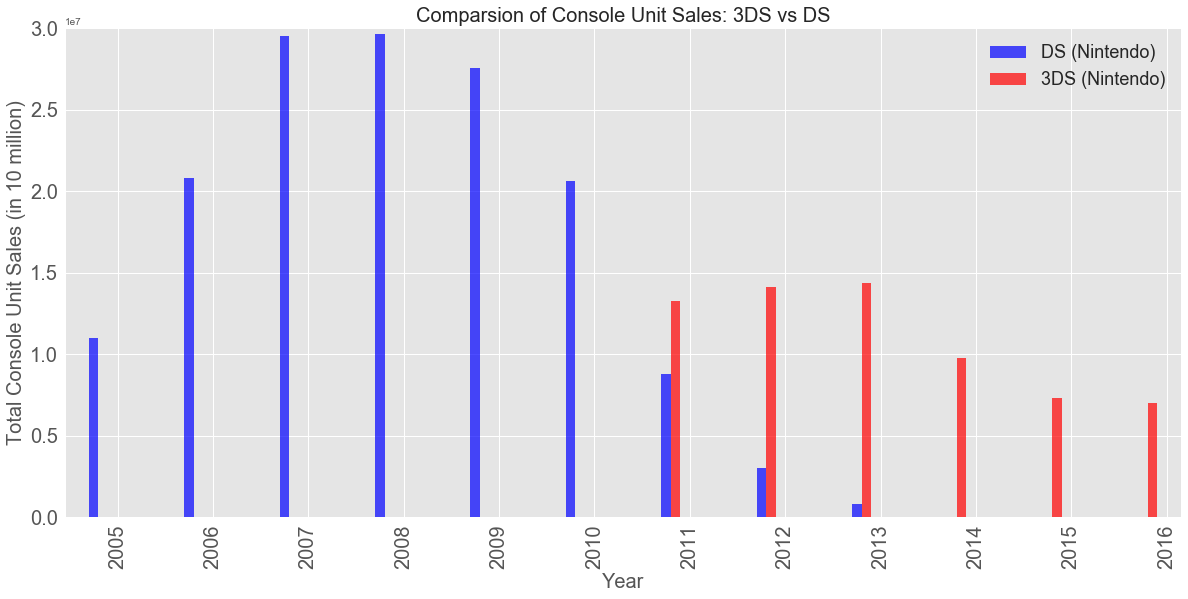

In [52]:
#3DS, DS 
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['DS', '3DS']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total Console Unit Sales (in 10 million)", fontsize=20)
ax.set_xticklabels(dfpsall['Year'], fontsize=20)
ax.set_ylim([0,30000000])
plt.yticks(size = 20)
ax.set_title('Comparsion of Console Unit Sales: 3DS vs DS', fontsize=20)
plt.legend(['DS (Nintendo)', '3DS (Nintendo)']
           , loc='best',prop={'size':18})
ax


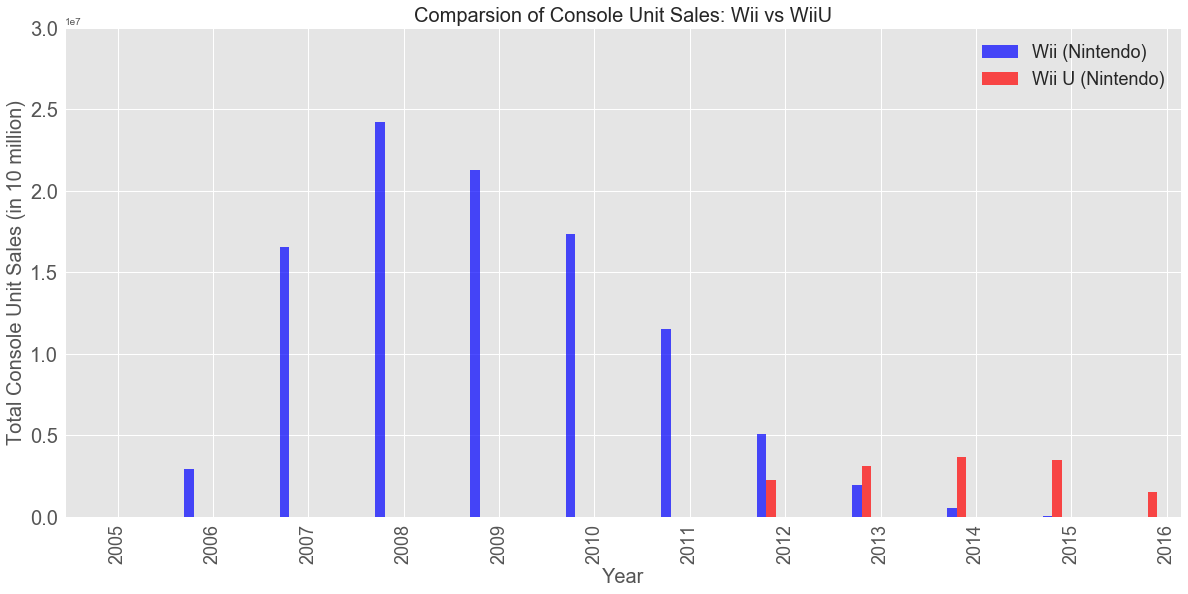

In [51]:
#Wii WiiU
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['Wii', 'WiiU']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total Console Unit Sales (in 10 million)", fontsize=20)
ax.set_xticklabels(dfpsall['Year'], fontsize=18)
ax.set_ylim([0,30000000])
plt.yticks(size = 20)
ax.set_title('Comparsion of Console Unit Sales: Wii vs WiiU', fontsize=20)
plt.legend(['Wii (Nintendo)', 'Wii U (Nintendo)']
           , loc='best',prop={'size':18})
ax

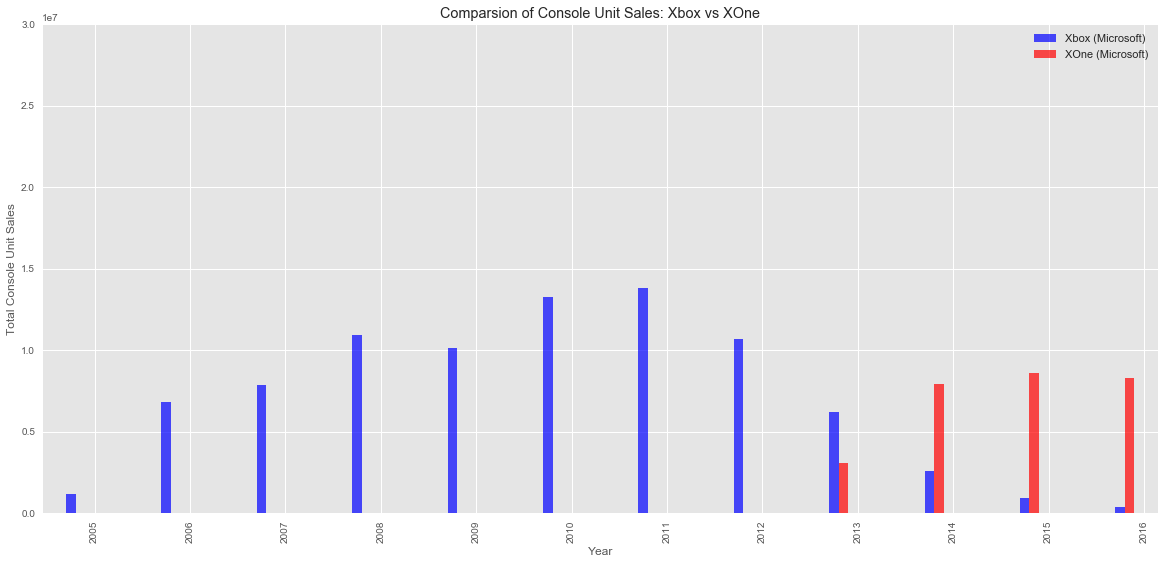

In [41]:
#Xbox, XOne
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['X360', 'XOne']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year")
ax.set_ylabel("Total Console Unit Sales")
ax.set_xticklabels(dfpsall['Year'])
ax.set_ylim([0,30000000])
ax.set_title('Comparsion of Console Unit Sales: Xbox vs XOne')
plt.legend(['Xbox (Microsoft)', 'XOne (Microsoft)']
           , loc='best',prop={'size':11})
ax

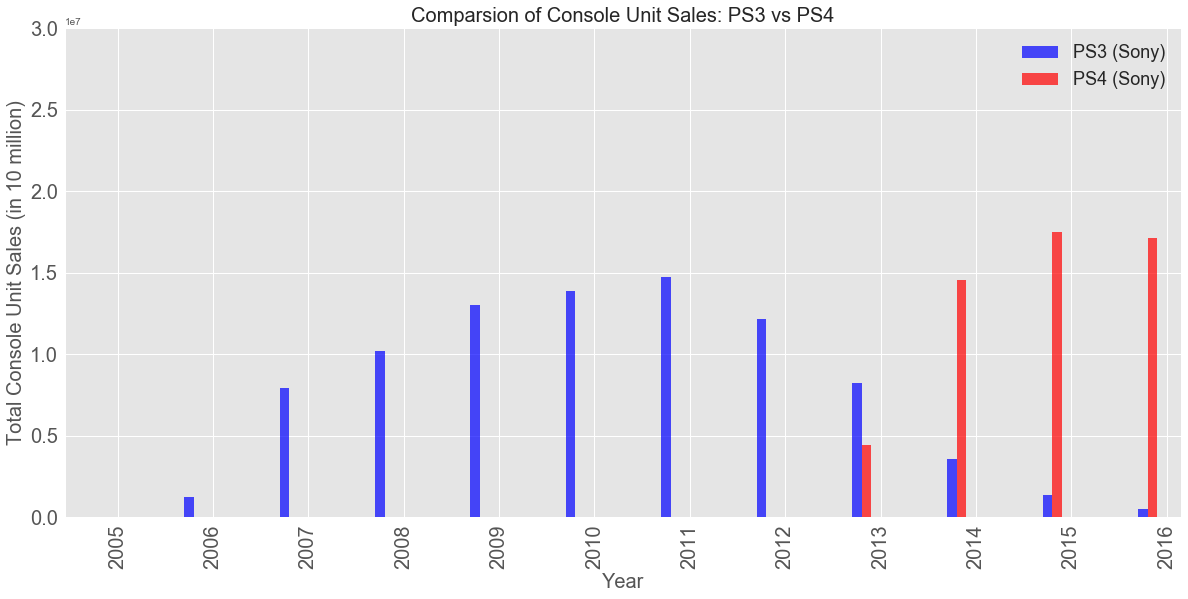

In [50]:
#PS3 PS4
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['PS3', 'PS4']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total Console Unit Sales (in 10 million)", fontsize=20)
ax.set_xticklabels(dfpsall['Year'], fontsize=20)
ax.set_ylim([0,30000000])
plt.yticks(size = 20)
ax.set_title('Comparsion of Console Unit Sales: PS3 vs PS4', fontsize=20)
plt.legend(['PS3 (Sony)', 'PS4 (Sony)']
           , loc='best',prop={'size':18})
ax

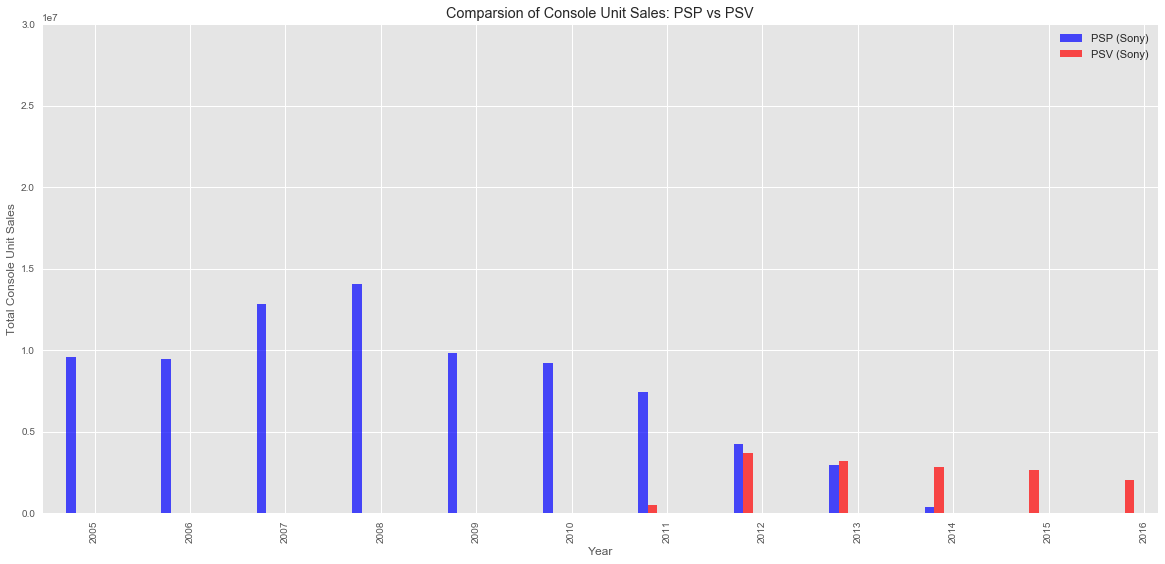

In [43]:
#PSP, PSV
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20, 9))
ax = dfpsall[['PSP', 'PSV']].plot.bar(stacked=False, width=0.2, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

ax.set_xlabel("Year")
ax.set_ylabel("Total Console Unit Sales")
ax.set_xticklabels(dfpsall['Year'])
ax.set_ylim([0,30000000])
ax.set_title('Comparsion of Console Unit Sales: PSP vs PSV')
plt.legend(['PSP (Sony)', 'PSV (Sony)']
           , loc='best',prop={'size':11})
ax